In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

# Chargement des données

In [2]:
df= pd.read_csv('https://www.labri.fr/perso/zemmari/datasets/cars_data-class.csv', delimiter =',')
df.head()

,Taille_Auto,Poids_Auto,Acceleration,Annee_Fabrication,Kilometrage,Nombre_Portes,Vitesse_Max,Prix_Assurance,Categorie_Voiture,Decote,Impact_Environnement
0,3.790317,8869.946374,2.038688,2006,135542.067972,5,195.289066,184.125577,1,0.104588,1
1,3.375892,1126.174079,2.067411,2010,33710.551662,5,249.979656,858.935088,3,0.346064,1
2,4.844971,6100.019066,4.839676,2016,112977.279109,5,235.763320,302.138838,4,0.394582,3
3,2.316172,5771.509867,1.202574,2014,50139.727635,4,216.802020,1298.671966,5,0.422048,2
4,2.618825,5676.666211,5.470806,2009,191188.750210,4,234.004505,702.626517,2,0.279959,1


# Analyse des données

In [3]:
print('Taille de l\'échantillon : ',len(df))

print('Différentes classes d\'impact sur l\'environnement : ', df.Impact_Environnement.unique())

print('Nombre de voitures ayant un impact sur l\'environnement de 0 : ', len(df[df.Impact_Environnement==0]))
print('Nombre de voitures ayant un impact sur l\'environnement de 1 : ', len(df[df.Impact_Environnement==1]))
print('Nombre de voitures ayant un impact sur l\'environnement de 2 : ', len(df[df.Impact_Environnement==2]))
print('Nombre de voitures ayant un impact sur l\'environnement de 3 : ', len(df[df.Impact_Environnement==3]))

Taille de l'échantillon :  1000
Différentes classes d'impact sur l'environnement :  [1 3 2 0]
Nombre de voitures ayant un impact sur l'environnement de 0 :  36
Nombre de voitures ayant un impact sur l'environnement de 1 :  537
Nombre de voitures ayant un impact sur l'environnement de 2 :  42
Nombre de voitures ayant un impact sur l'environnement de 3 :  385


**Notre échantillon de 1000 voitures présente 4 classes différentes pour l'impact sur l'environnement : 0, 1, 2, 3. On remarque que les tailles de ces 4 classes sont fortement déséquilibrées.**

# Traitement des données

In [4]:
X = df.drop(['Impact_Environnement'], axis=1)
y = df['Impact_Environnement']

### Standardisation des données

**Ici, nous standardisons nos données afin de les mettre à la même échelle.**

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X) 

# SVM 

**Nous avons choisis d'utiliser l'algorithme de machine learning SVM (Support Vector Machine) qui permet la classification des données.
De plus, l'échantillon étant de petite taille nous effectuons une validation croisée avec la méthode leave one out.
Comme nous l'avons vu précédemment, nos données sont déséquilibrées. Il est donc important de les équilibrer. Pour cela nous allons appliquer une méthode d'oversampling : SMOTE, qui va permettre de créer de nouveaux échantillons similaires pour les classes minoritaires.**

In [6]:
loo = LeaveOneOut()
results = np.zeros(len(y)) 

for train, test in loo.split(X):
    print("---", test, "---")
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    print('    y : ', y_test.values)  

    smote = SMOTE()
    X_train_oversample, y_train_oversample = smote.fit_resample(X_train, y_train)
    
    clf = SVC()
    clf.fit(X_train_oversample, y_train_oversample)

    results[test] = clf.predict(X_test)
    print('    predict : ', results[test])
    print()
    


--- [0] ---
    y :  [1]
    predict :  [3.]

--- [1] ---
    y :  [1]
    predict :  [1.]

--- [2] ---
    y :  [3]
    predict :  [3.]

--- [3] ---
    y :  [2]
    predict :  [0.]

--- [4] ---
    y :  [1]
    predict :  [1.]

--- [5] ---
    y :  [1]
    predict :  [1.]

--- [6] ---
    y :  [1]
    predict :  [1.]

--- [7] ---
    y :  [3]
    predict :  [1.]

--- [8] ---
    y :  [1]
    predict :  [1.]

--- [9] ---
    y :  [1]
    predict :  [2.]

--- [10] ---
    y :  [1]
    predict :  [2.]

--- [11] ---
    y :  [2]
    predict :  [2.]

--- [12] ---
    y :  [1]
    predict :  [1.]

--- [13] ---
    y :  [1]
    predict :  [1.]

--- [14] ---
    y :  [0]
    predict :  [1.]

--- [15] ---
    y :  [1]
    predict :  [1.]

--- [16] ---
    y :  [3]
    predict :  [3.]

--- [17] ---
    y :  [3]
    predict :  [3.]

--- [18] ---
    y :  [3]
    predict :  [3.]

--- [19] ---
    y :  [0]
    predict :  [1.]

--- [20] ---
    y :  [1]
    predict :  [3.]

--- [21] ---
    y :  [

              precision    recall  f1-score   support

           0       0.14      0.28      0.19        36
           1       0.87      0.86      0.86       537
           2       0.26      0.36      0.30        42
           3       0.91      0.81      0.86       385

    accuracy                           0.80      1000
   macro avg       0.55      0.58      0.55      1000
weighted avg       0.83      0.80      0.81      1000



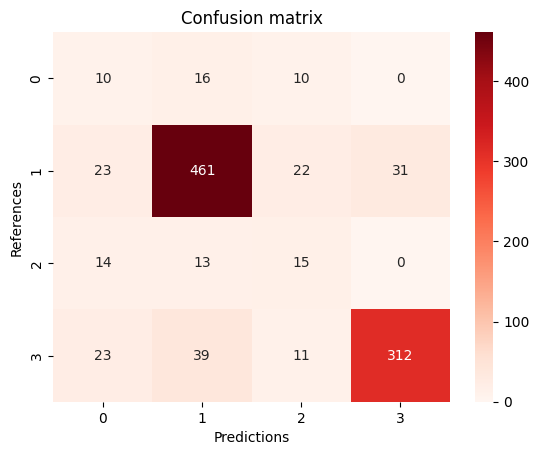

In [7]:
print(classification_report(y, results))

conf_matrix = confusion_matrix(y, results)
classes = ["0", "1", "2", "3"]
sns.heatmap(conf_matrix, annot = True, cmap="Reds", fmt = "d", xticklabels = classes, yticklabels = classes)
plt.xlabel("Predictions")
plt.ylabel("References")
plt.title("Confusion matrix")
plt.show()

**Dans l'ensemble on obtient de bons résultats avec une accuracy de 0.80. Mais si on regarde les résultats pour chaque classe, on observe des moins bons résultats pour la classe 0 et 2. Cela est justifié par le déséquilibre des classes, malgré l'oversampling effectué. Au contraire les classes 1 et 3 présentent de très bons résultats.
Afin d'obtenir de meilleurs résultats sur l'ensemble des données, il nous aurait fallu plus de données, particulièrement sur les classes 0 et 2.**